Adapted from: https://towardsdatascience.com/umap-variance-explained-b0eacb5b0801

In [14]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1)
labels = mnist.target.astype(int)
print(mnist.data.shape)
#(70000, 784)



(70000, 784)


In [15]:
d = mnist.data.to_numpy()

In [16]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


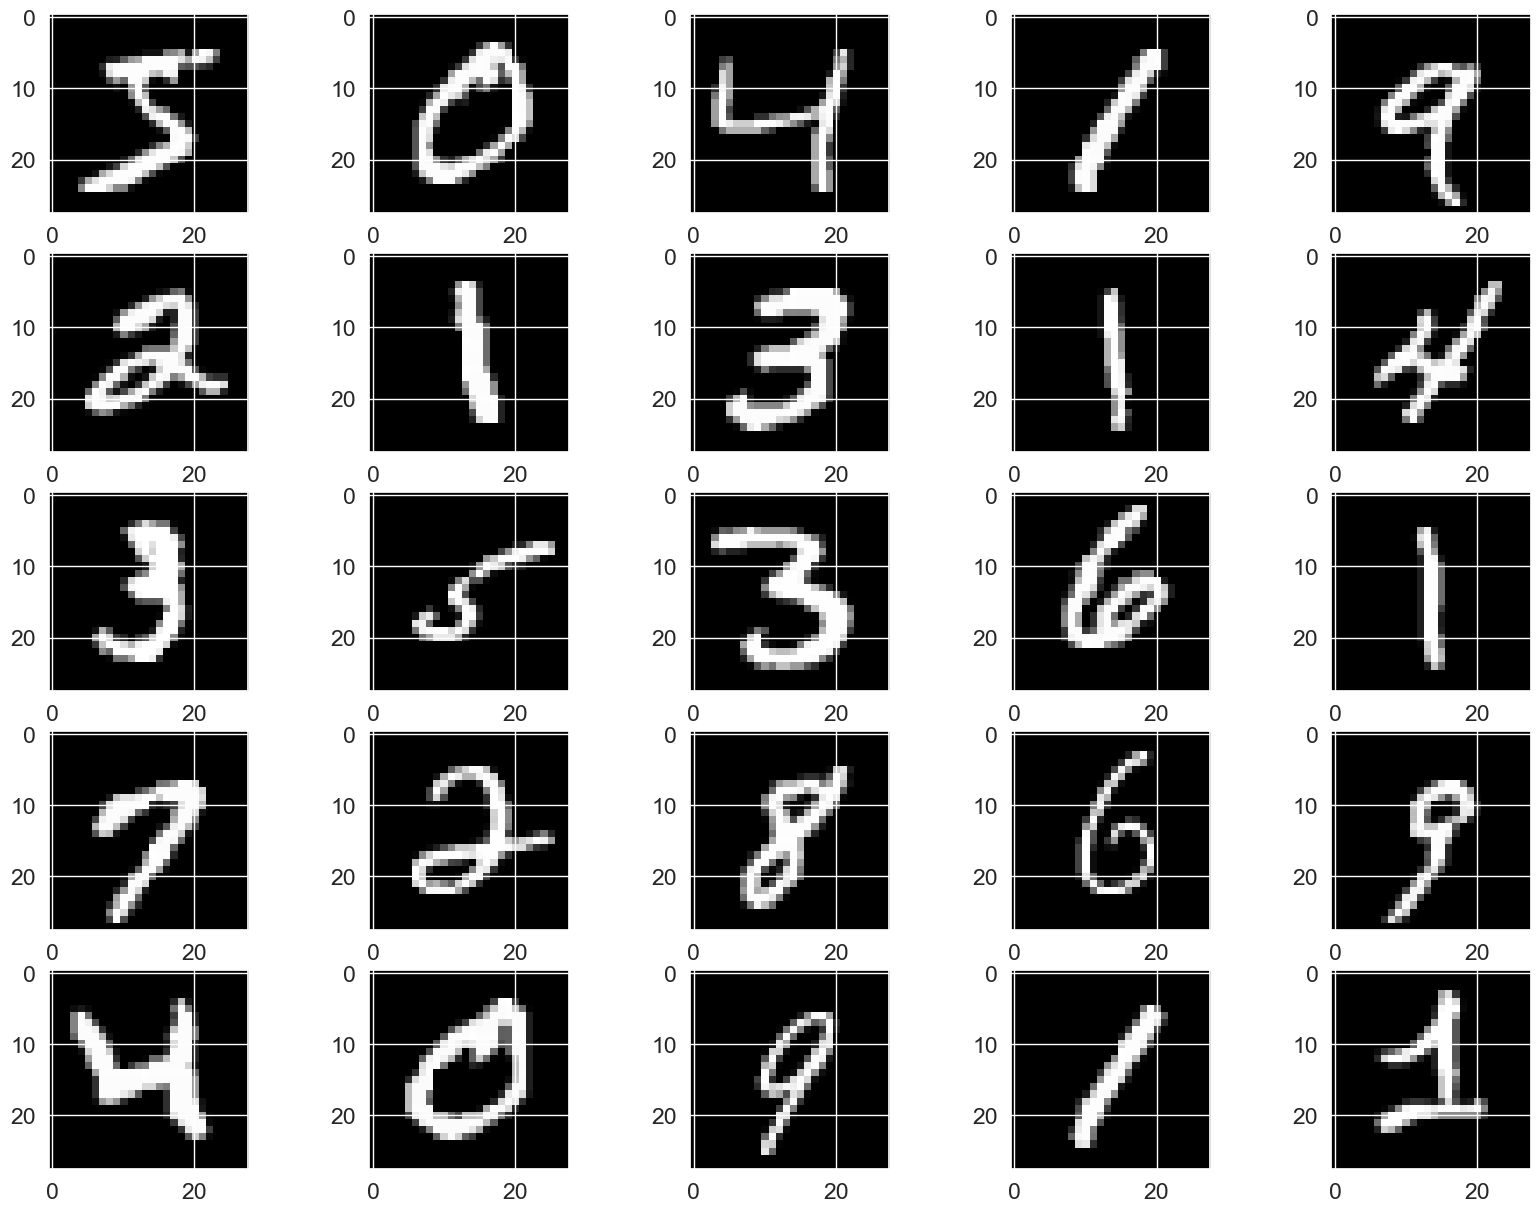

In [17]:
from matplotlib import pyplot as plt

plt.figure(figsize = (20, 15))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(d[i].reshape(28,28), cmap = plt.get_cmap('gray'))

plt.show()

In [18]:
import numpy as np

N_points = 10000

X = np.log10(d + 1)
#X = mnist.data / 255

np.random.seed(123)
random_indices = np.random.choice(X.shape[0], size=N_points, replace=False)
X = X[random_indices,:]
labels = labels[random_indices]

Observed variance explained:
[0.11043074 0.07698788 0.06564009 0.05835455 0.04983201 0.04556471
 0.03336833 0.02898735 0.02736869 0.02373547]


Finished 1 permutations
Finished 2 permutations
Finished 3 permutations
Finished 4 permutations
Finished 5 permutations
Finished 6 permutations
Finished 7 permutations
Finished 8 permutations
Finished 9 permutations
Finished 10 permutations

Permuted variance explained:
[0.002110495223776359, 0.002082817353131103, 0.0020737835173461694, 0.002068181537076531, 0.00205940726907657, 0.0020541773956727345, 0.002044391263394531, 0.0020402233529449227, 0.0020368949440908207, 0.0020312493727298597]

Number of significant Principal Components: 62
Together they explain 86% of variation in the data


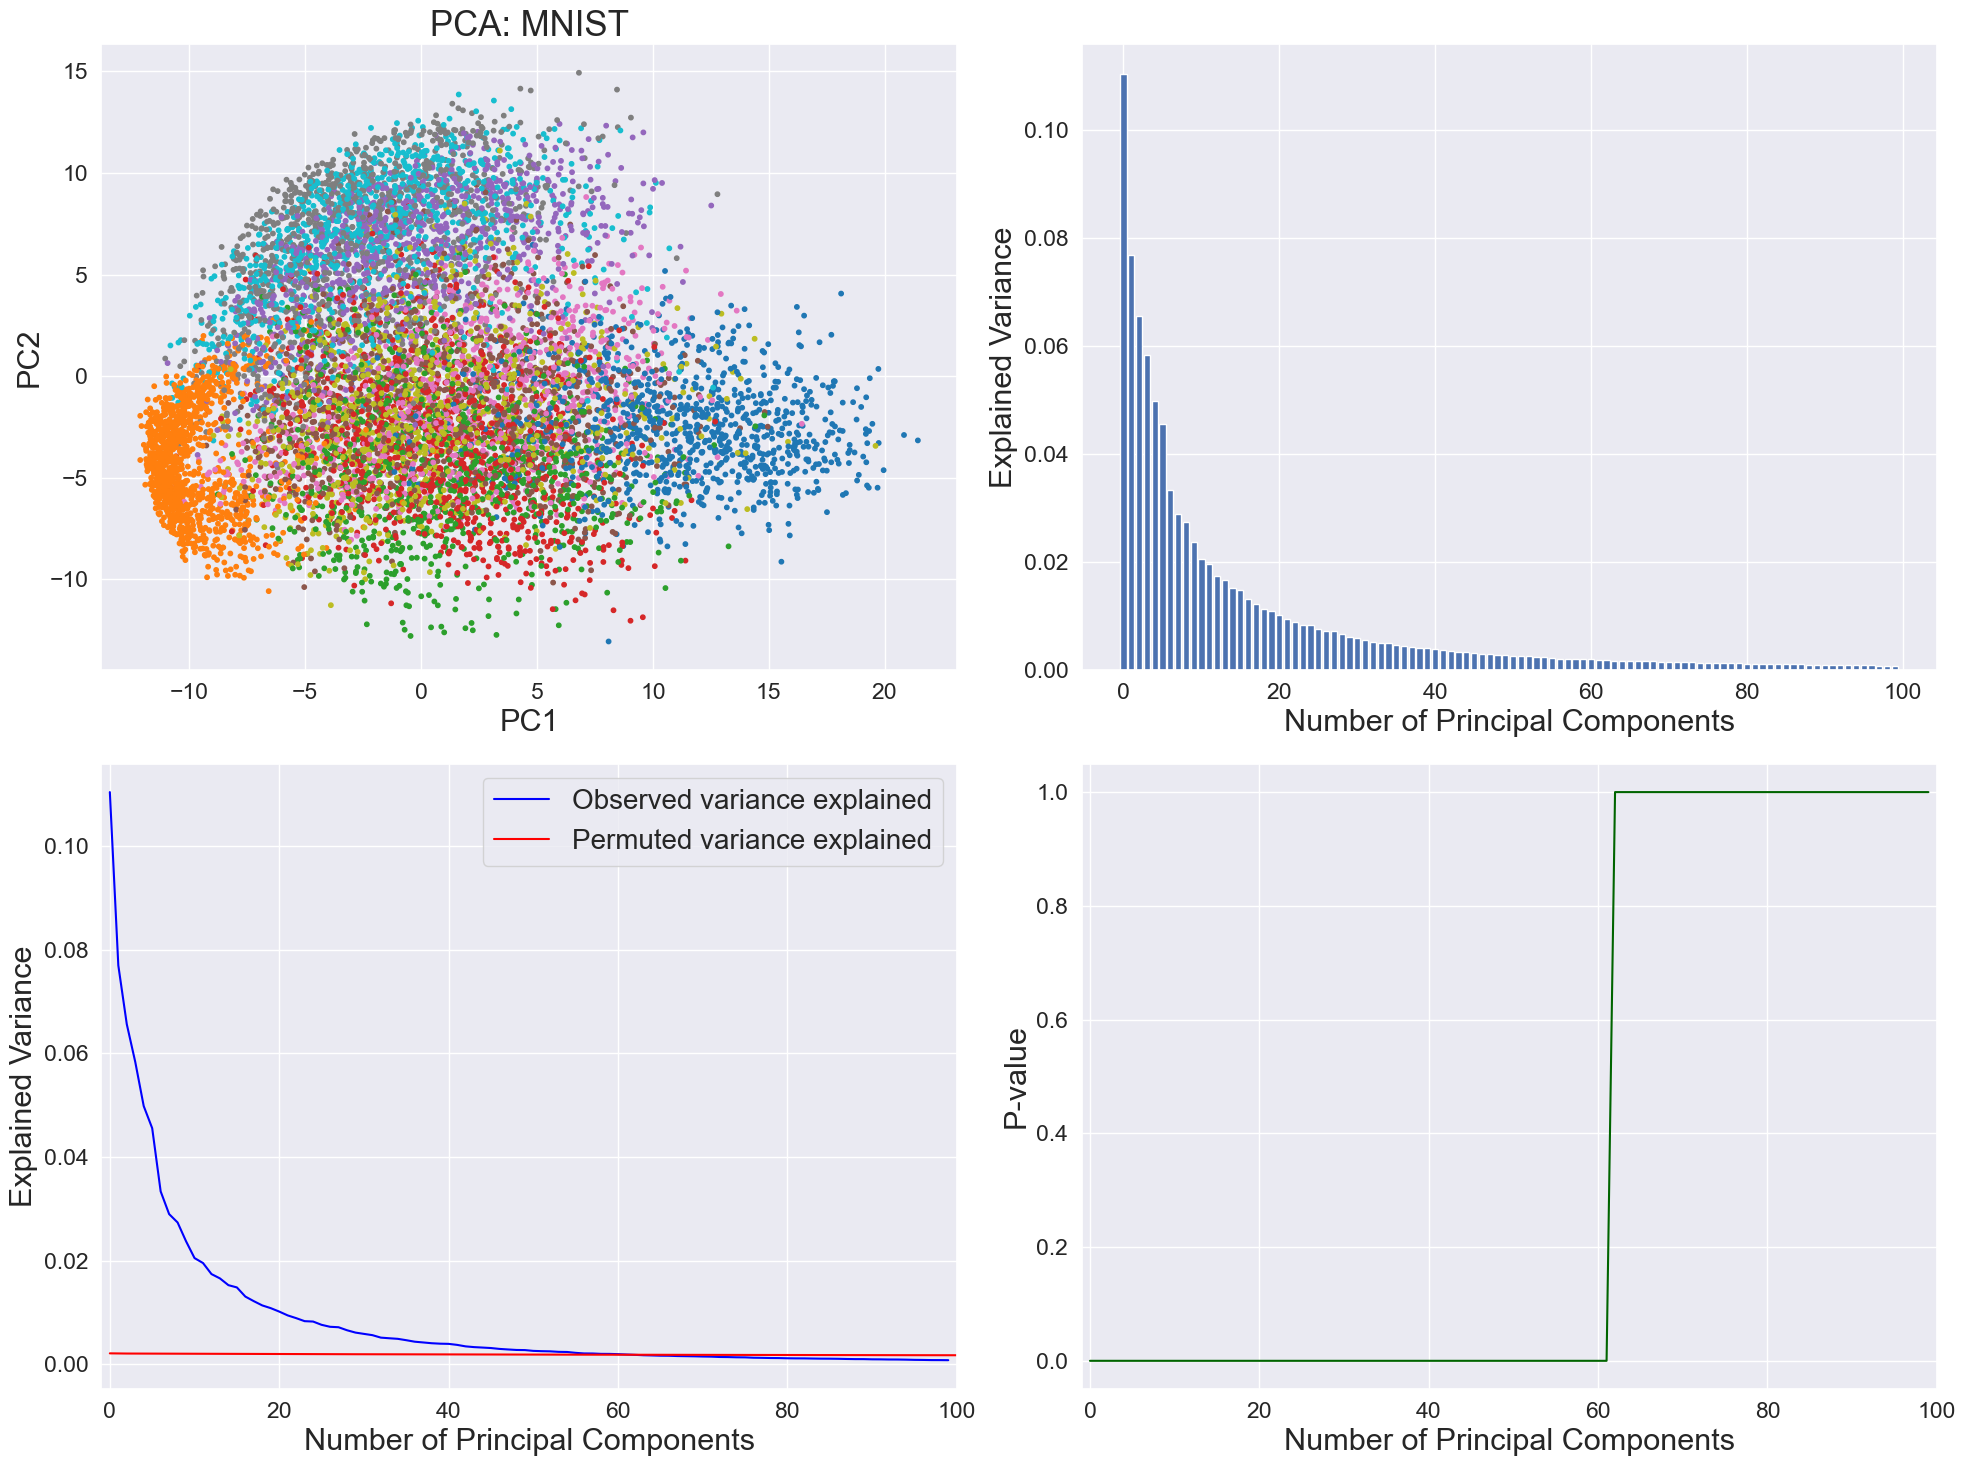

In [19]:
import pandas as pd; import matplotlib.pyplot as plt
from sklearn.decomposition import PCA; import seaborn as sns

N_pca_comps = 100

sns.set(font_scale = 1.5); figure = plt.figure(figsize = (20, 15))

plt.subplot(221)
X_reduced = PCA(n_components = 2).fit_transform(X)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels, cmap='tab10', s=10)
plt.title('PCA: MNIST', fontsize = 25)
plt.xlabel('PC1', fontsize = 22); plt.ylabel('PC2', fontsize = 22)

plt.subplot(222)
pca = PCA(n_components = N_pca_comps).fit(X)
print('Observed variance explained:')
print(pca.explained_variance_ratio_[0:10]); print('\n')
plt.bar(range(len(pca.explained_variance_ratio_)), 
        pca.explained_variance_ratio_)
plt.xlabel('Number of Principal Components', fontsize = 22)
plt.ylabel('Explained Variance', fontsize = 22)

N_perm = 10
X_flat = X.flatten()
expl_var_perm_df = pd.DataFrame(index = list(range(N_perm)), 
                                columns = list(range(X.shape[1])))
for i in range(N_perm):
    np.random.shuffle(X_flat)
    X_perm = X_flat.reshape(X.shape[0], X.shape[1])
    pca_perm = PCA().fit(X_perm)
    expl_var_perm_df.loc[i] = pca_perm.explained_variance_ratio_
    print('Finished {} permutations'.format(i + 1))
    X_perm = list(expl_var_perm_df.mean(axis = 0) + 
                  2*expl_var_perm_df.std(axis = 0)) 

print('\nPermuted variance explained:')
print(X_perm[0:10])

plt.subplot(223)
plt.plot(pca.explained_variance_ratio_, c = 'blue')
plt.plot(X_perm, c = 'red'); plt.xlim([-1, N_pca_comps])
plt.xlabel('Number of Principal Components', fontsize = 22)
plt.ylabel('Explained Variance', fontsize = 22)
plt.gca().legend(('Observed variance explained', 
                  'Permuted variance explained'), fontsize = 20)

plt.subplot(224)
pval = list()
for j in range(N_pca_comps):
    pval.append(np.sum(expl_var_perm_df.iloc[:, j] + 
                       2*expl_var_perm_df.std(axis = 0) >= 
                       pca.explained_variance_ratio_[j]) / N_perm)
plt.plot(pval, c = 'darkgreen')
plt.xlabel('Number of Principal Components', fontsize = 22)
plt.ylabel('P-value', fontsize = 22); plt.xlim([-1, N_pca_comps])
N_opt_pcs = np.where(np.array(pval) >= 0.05)[0][0]
print('\nNumber of significant Principal Components: {}'.format(N_opt_pcs))
print('Together they explain {}% of variation in the data'.\
format(int(round(sum(pca.explained_variance_ratio_[0:\
np.where(np.array(pval) >= 0.05)[0][0]])*100,0))))

figure.tight_layout()
plt.show()

In [20]:
import umap.umap_ as umap

/var/folders/3g/0z0x34kn6yx3x15_9cwxs1v80000gn/T/ipykernel_36029/945867232.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  opt_perp = np.int(np.round(np.sqrt(X.shape[0]), 0))


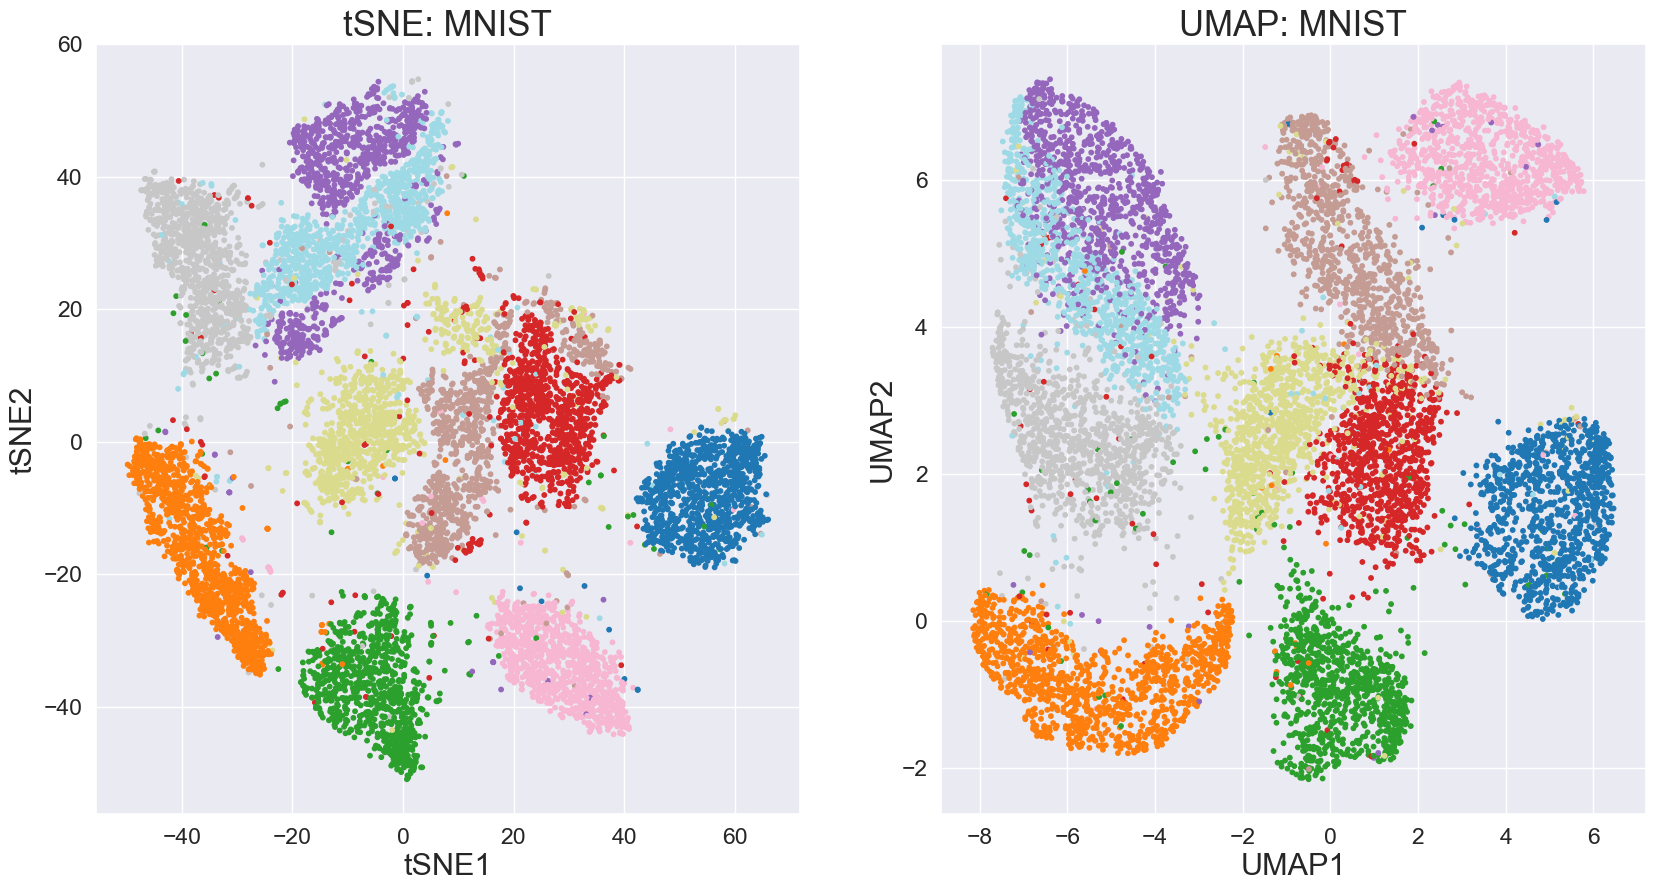

In [21]:
import numpy as np
import seaborn as sns; import matplotlib.pyplot as plt
from sklearn.manifold import TSNE; from sklearn.decomposition import PCA

opt_perp = np.int(np.round(np.sqrt(X.shape[0]), 0))
X_reduced = PCA(n_components = N_opt_pcs).fit_transform(X)

umap_embedding = umap.UMAP(n_components = 2, n_neighbors = opt_perp, 
                           init = X_reduced[:, 0:2], 
                           min_dist=0.3, n_epochs = 1000, random_state = 123, 
                           verbose = 0).fit_transform(X_reduced)

tsne_embedding = TSNE(n_components=2, perplexity=opt_perp, 
                      init=X_reduced[:, 0:2], 
                      learning_rate = 200, n_iter = 1000, random_state = 123, 
                      verbose = 0).fit_transform(X_reduced)

sns.set(font_scale = 1.5); plt.figure(figsize = (20, 10))

plt.subplot(121)
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c = labels, s = 10, 
            cmap = 'tab20')
plt.title('tSNE: MNIST', fontsize = 25)
plt.xlabel("tSNE1", fontsize = 22); plt.ylabel("tSNE2", fontsize = 22)

plt.subplot(122)
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c = labels, s = 10, 
            cmap = 'tab20')
plt.title('UMAP: MNIST', fontsize = 25)
plt.xlabel("UMAP1", fontsize = 22); plt.ylabel("UMAP2", fontsize = 22)

plt.show()